# Stock prediction using LSTM
In this notebook, we have attempted to use LSTM to predict the closing price of FANG stocks. First, we need to include some modules that will be used for the plotting and ML models.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("seaborn-pastel")
%matplotlib inline

from pandas_datareader.data import DataReader
from datetime import datetime


For this example, we will use AAPl, GOOG, MSFT and AMZN. We can use DataReader to get live data from Yahoo on these stocks.

In [4]:
companies = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for ticker in companies:
    globals()[ticker] = DataReader(ticker, 'yahoo', start, end)

We can start by doing analysis on one of the stocks, Amazon. Lets get the stock prices for the past 8 years.

In [5]:
df = DataReader('AMZN', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
2012-01-10,182.399994,177.100006,181.100006,179.339996,3985800,179.339996
2012-01-11,180.770004,178.190002,179.639999,178.899994,3102700,178.899994
2012-01-12,179.490005,175.750000,179.419998,175.929993,5385800,175.929993
2012-01-13,178.800003,173.500000,175.809998,178.419998,4753500,178.419998


We have information on the high, low, open, close, and volume for each day in the past year. If we look at the plot of the close price (which is what we'll use for analysis), you can see the fluctiation in price.

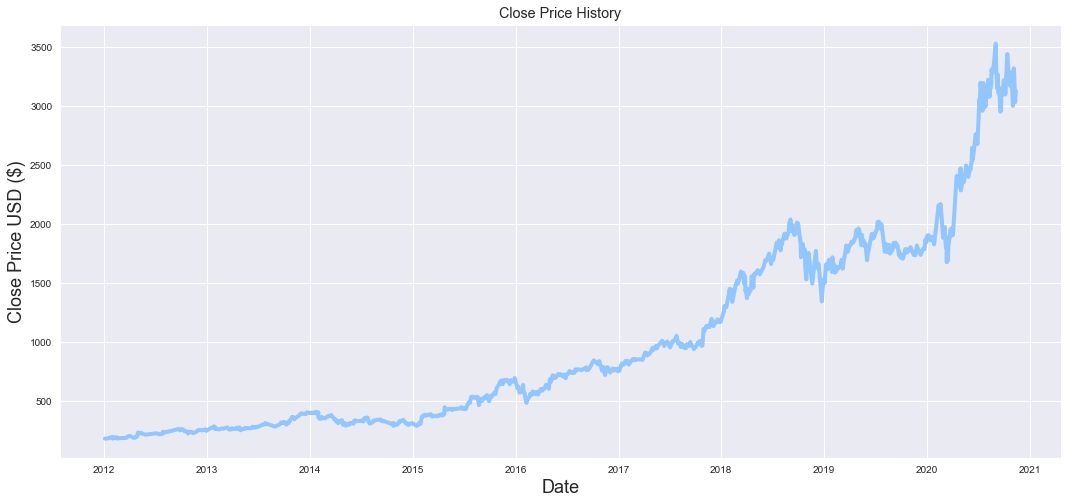

In [130]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

for our dataset, we will just be working with the Close prices. For this example, we can use 60% of the data for training, and 40% for testing.

In [131]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .6 ))

training_data_len

1117

We need to scale the data so that it is easier to work with in the model.

In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[9.23852679e-04],
       [4.70866468e-04],
       [5.00669928e-04],
       ...,
       [8.82563637e-01],
       [8.74484453e-01],
       [8.80006706e-01]])

Next, let's grab some training data for the model.

In [133]:

train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


Keras makes it easy to implement LSTM.

In [134]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1057/1057 [==============================] - 34s 32ms/step - loss: 9.5712e-05


Finally, we can test the model on the 40% left of the data, and calculate the RMSE.

In [135]:

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

81.68879071802927

As you can see, our model did pretty well. On average, it predicted a bit low on the closing prices.

/Users/harrisonheeb/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


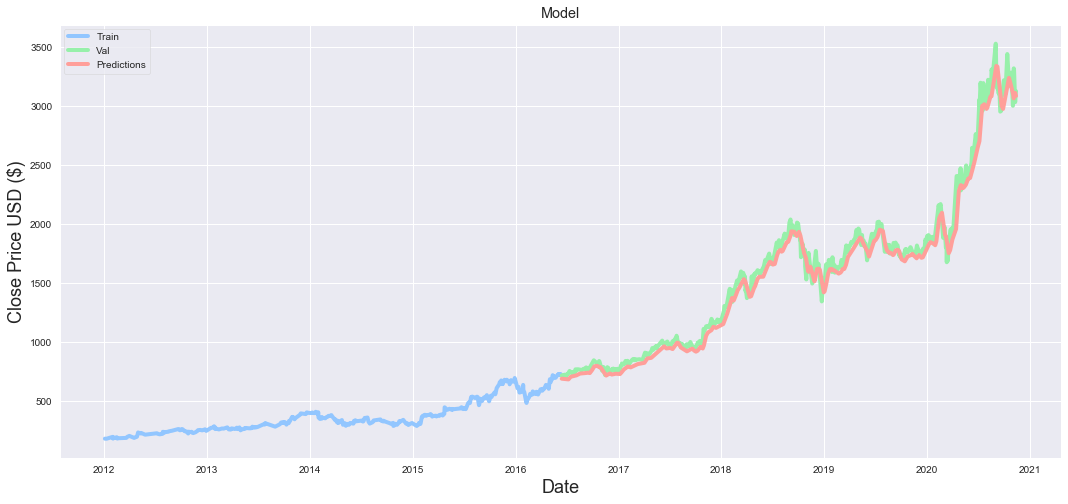

In [136]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [137]:
valid

,Close,Predictions
Date,,
2016-06-13,715.239990,688.075256
2016-06-14,719.299988,687.483826
2016-06-15,714.260010,686.832581
2016-06-16,717.510010,685.760254
2016-06-17,706.390015,684.851562
2016-06-20,714.010010,683.124451
2016-06-21,715.820007,681.792786
2016-06-22,710.599976,680.965088
2016-06-23,722.080017,680.028687


Now let's use the method we just developed again, but on the remaining 3 tickers.

Epoch 1/1
1280/1280 [==============================] - 41s 32ms/step - loss: 1.2722e-04
/Users/harrisonheeb/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


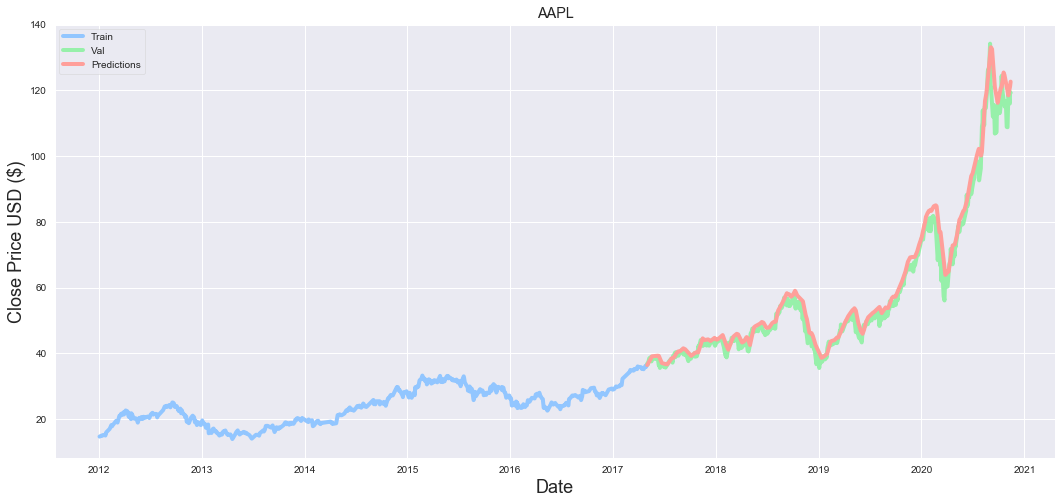

Epoch 1/1
1280/1280 [==============================] - 41s 32ms/step - loss: 4.6739e-04


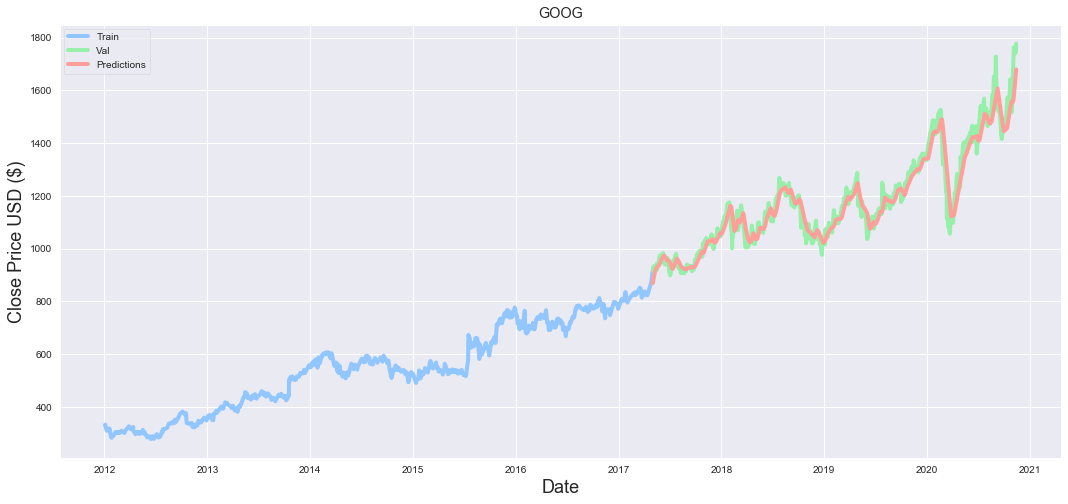

Epoch 1/1
1280/1280 [==============================] - 41s 32ms/step - loss: 1.1511e-04


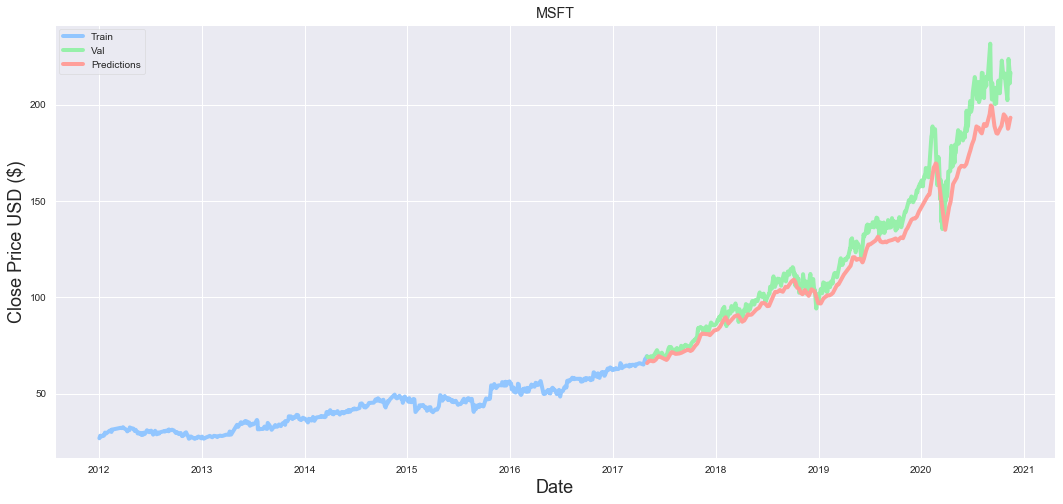

Epoch 1/1
1280/1280 [==============================] - 42s 32ms/step - loss: 1.1814e-04


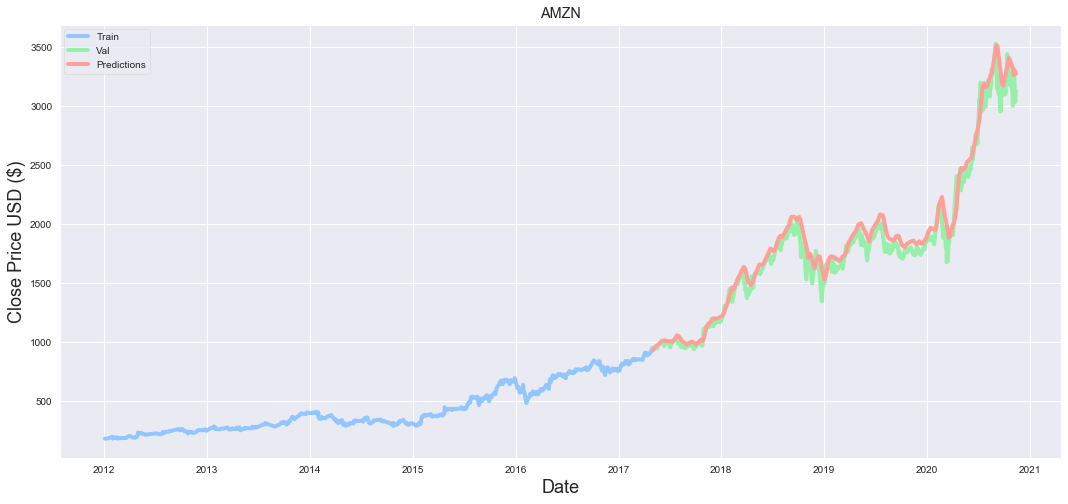

In [138]:
for i, company in enumerate(companies, 1):
    df = DataReader(company, data_source='yahoo', start='2012-01-01', end=datetime.now())
    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil( len(dataset) * .6 ))

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)


    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
            
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences= False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(x_train, y_train, batch_size=1, epochs=1)
    test_data = scaled_data[training_data_len - 60: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
        
    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title(company)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
    plt.show()